In [8]:
import scanpy as sc
import seaborn as sns
import numpy as np
import pickle

sc.settings.verbosity = 3

In [9]:
with open("../data/adata_epi_last.pickle", "rb") as f:
    adata_epi = pickle.load(f)

In [10]:
sc.tl.rank_genes_groups(adata_epi, "Stage", groups = ["Early_Stages"], reference = "Healthy", key_added = "early_vs_healthy")
sc.tl.filter_rank_genes_groups(adata_epi, key = "early_vs_healthy", key_added = "early_vs_healthy_filtered", 
                               min_fold_change = -1000, min_in_group_fraction = 0.1)

ranking genes
    finished: added to `.uns['early_vs_healthy']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: -1000, max_out_group_fraction: 0.5


In [11]:
df = sc.get.rank_genes_groups_df(adata_epi, group = "Early_Stages", key = "early_vs_healthy_filtered")
df = df.dropna()
df_sorted = df.sort_values("logfoldchanges", ascending = False)

In [12]:
df_stat = df_sorted[df_sorted["pvals_adj"] < 0.01]
df_stat["-log_pval"] = -1*np.log10(df_stat["pvals_adj"])

/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_2087/1326119972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat["-log_pval"] = -1*np.log10(df_stat["pvals_adj"])


In [13]:
liste = []
threshold = 0.58
for i in df_stat.values: #2 = foldchange, 4 = pval_adj
    if i[2] > threshold:
        liste.append("UP")
    elif i[2] < -threshold : 
        liste.append("DOWN")
    else:
        liste.append("NONE")
df_stat["assignation"] = liste

/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_2087/728701950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat["assignation"] = liste


In [14]:
df_up = df_stat[df_stat["assignation"] == "UP"]
print(f"{df_up.shape[0]} DEG with logFC > {threshold}, showing top 20 : ")
df_up[0:20]

612 DEG with logFC > 0.58, showing top 20 : 


,names,scores,logfoldchanges,pvals,pvals_adj,-log_pval,assignation
5,Gm8439,14.002976,2.834374,7.857024e-38,1.762455e-35,34.753882,UP
32,Anxa3,10.938049,2.762503,4.501243e-25,5.353758e-23,22.271341,UP
86,Krt23,9.484545,2.730524,1.028516e-19,8.018662e-18,17.095898,UP
2,C1qtnf1,18.067690,2.640577,9.838808e-57,7.862437e-54,53.104443,UP
35,Gm12860,10.801188,2.560549,1.285545e-24,1.448192e-22,21.839174,UP
135,Cyp1b1,8.682987,2.296718,5.484577e-17,3.420771e-15,14.465876,UP
75,Palmd,9.800392,2.219614,7.111413e-21,6.061769e-19,18.217401,UP
59,Sdf2l1,10.130613,1.924552,4.307554e-22,4.125572e-20,19.384516,UP
200,Hrct1,8.028702,1.881643,6.768319e-15,3.373868e-13,12.471872,UP
147,Fam20c,8.588696,1.867067,1.032797e-16,6.185173e-15,14.208648,UP


In [15]:
df_down = df_stat[df_stat["assignation"] == "DOWN"]
df_down = df_down.sort_values("logfoldchanges", ascending = True)
print(f"{df_down.shape[0]} DEG with logFC < {-threshold}, showing top 20 : ")
df_down[0:20]

105 DEG with logFC < -0.58, showing top 20 : 


,names,scores,logfoldchanges,pvals,pvals_adj,-log_pval,assignation
25520,Angpt1,-15.718726,-1.525894,4.080095e-49,1.968607e-46,45.705841,DOWN
25489,Rhov,-14.548824,-1.442688,2.774432e-43,8.652168e-41,40.062875,DOWN
25472,C4b,-13.961451,-1.436958,4.012264e-40,1.005898e-37,36.997446,DOWN
25498,Arhgef6,-14.892107,-1.417156,2.480794e-44,8.690256e-42,41.060967,DOWN
25483,Zfp395,-14.472552,-1.368044,7.064648e-43,2.125379e-40,39.672564,DOWN
25440,Gm13889,-12.721729,-1.351332,6.282672e-34,1.123500e-31,30.949427,DOWN
25519,Itprid1,-15.515119,-1.336626,3.953590e-47,1.805379e-44,43.743432,DOWN
25473,Nav2,-13.961978,-1.314602,6.147178e-40,1.526171e-37,36.816397,DOWN
25524,Btn1a1,-16.143040,-1.299934,6.014505e-50,3.015744e-47,46.520606,DOWN
25544,Atp6v1b1,-17.669643,-1.295938,3.858035e-58,3.288589e-55,54.482990,DOWN


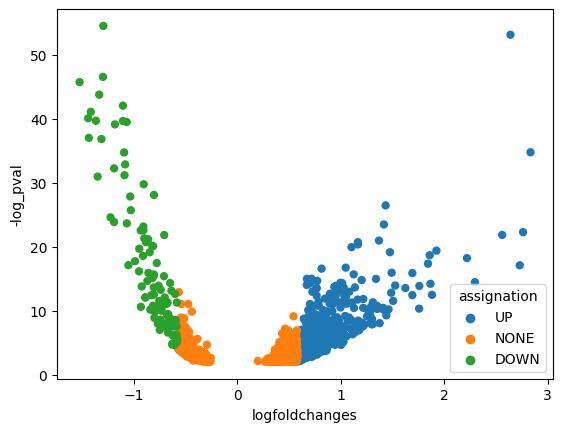

In [16]:
ax = sns.scatterplot(df_stat, x = "logfoldchanges", y = '-log_pval', linewidth = 0, hue = "assignation")


## Up-regulated pathways
[//]: # (-.- .tabset .tabset-pills)

In [17]:
up_Early_vs_Healthy_epi = list(df_up["names"].values)

In [18]:
df_enrich = sc.queries.enrich(up_Early_vs_Healthy_epi,org = "mmusculus")

In [19]:
np.unique(df_enrich["source"])

df_enrich["-log_pval"] = -1*np.log10(df_enrich["p_value"])
df_enrich["gene_ratio"] = [df_enrich.loc[i, "intersection_size"] / df_enrich.loc[i, "query_size"] for i in df_enrich.index]

### pval_adj
[//]: # (-.- .tabset .tabset-pills)

#### KEGG

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

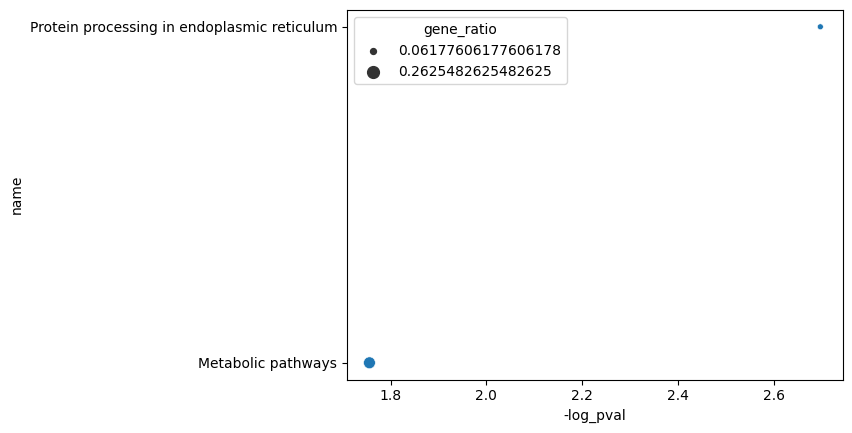

In [20]:
temp = df_enrich[df_enrich["source"] == "KEGG"]

sns.scatterplot(temp[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

#### GO:BP

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

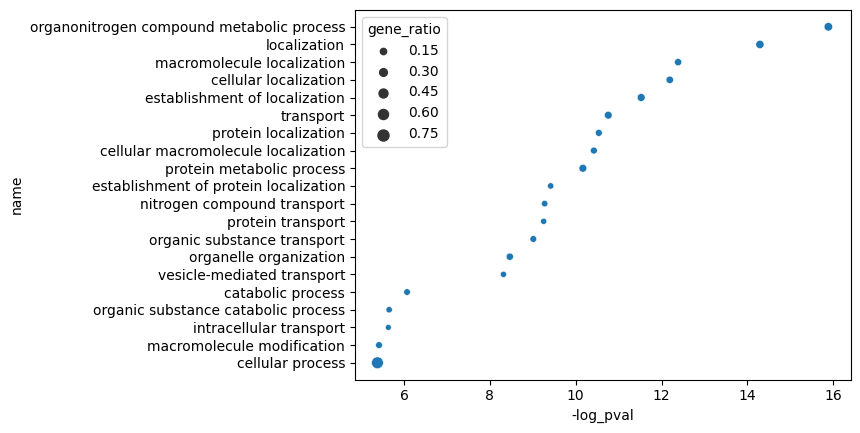

In [21]:
temp = df_enrich[df_enrich["source"] == "GO:BP"]

sns.scatterplot(temp[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

#### REAC

<AxesSubplot: >

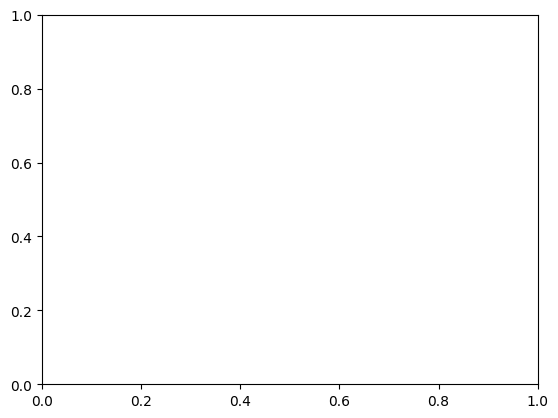

In [22]:
temp = df_enrich[df_enrich["source"] == "REAC"]

sns.scatterplot(temp[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

#### All databases

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

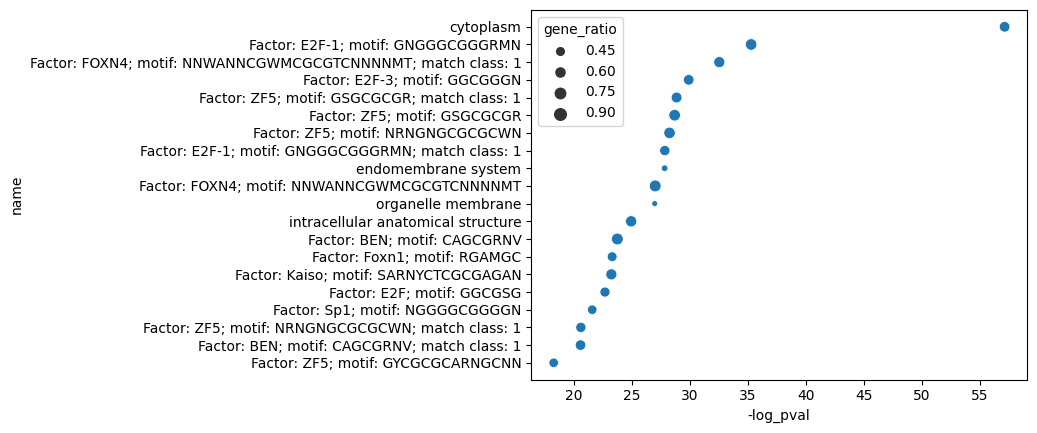

In [23]:
sns.scatterplot(df_enrich[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

### Precision
[//]: # (-.- .tabset .tabset-pills)

In [24]:
test = df_enrich.sort_values("precision", ascending = False)

#### KEGG

<AxesSubplot: xlabel='precision', ylabel='name'>

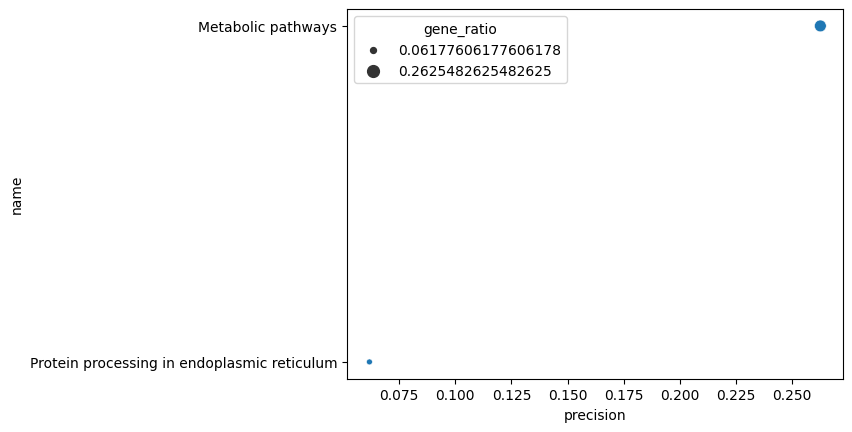

In [25]:
temp = test[test["source"] == "KEGG"]

sns.scatterplot(temp[0:20], x = "precision", y = "name", size = "gene_ratio")

#### GO:BP

<AxesSubplot: xlabel='precision', ylabel='name'>

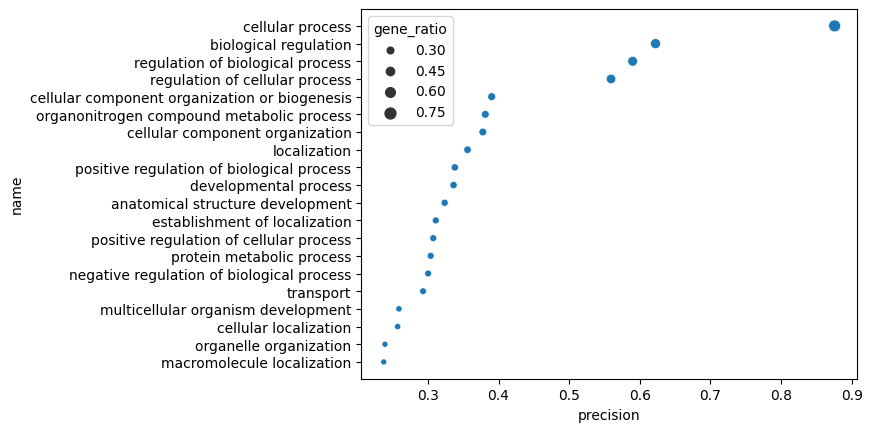

In [26]:
temp = test[test["source"] == "GO:BP"]

sns.scatterplot(temp[0:20], x = "precision", y = "name", size = "gene_ratio")

#### REAC

<AxesSubplot: >

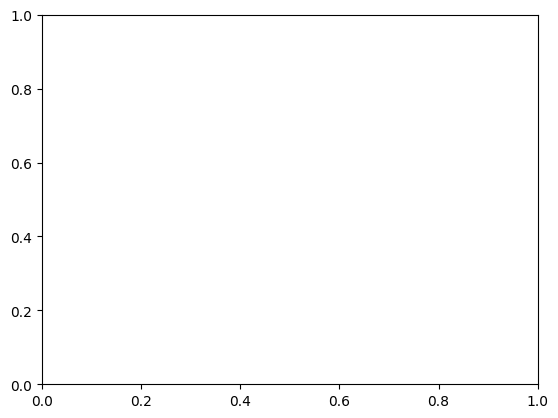

In [27]:
temp = test[test["source"] == "REAC"]

sns.scatterplot(temp[0:20], x = "precision", y = "name", size = "gene_ratio")

## Down-regulated pathways
[//]: # (-.- .tabset .tabset-pills)

In [29]:
down_Early_vs_Healthy_epi = list(df_down["names"].values)

In [30]:
df_enrich = sc.queries.enrich(down_Early_vs_Healthy_epi,org = "mmusculus")

In [31]:
np.unique(df_enrich["source"])

df_enrich["gene_ratio"] = [df_enrich.loc[i, "intersection_size"] / df_enrich.loc[i, "query_size"] for i in df_enrich.index]
df_enrich["-log_pval"] = -1*np.log10(df_enrich["p_value"])

### pval_adj
[//]: # (-.- .tabset .tabset-pills)

#### KEGG

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

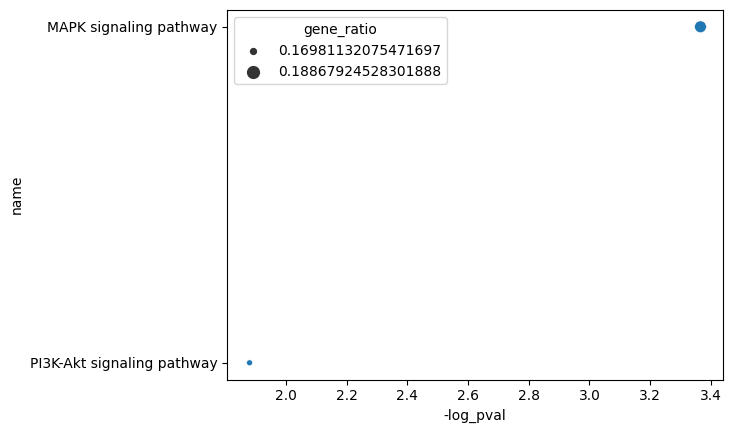

In [32]:
temp = df_enrich[df_enrich["source"] == "KEGG"]

sns.scatterplot(temp[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

#### GO:BP

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

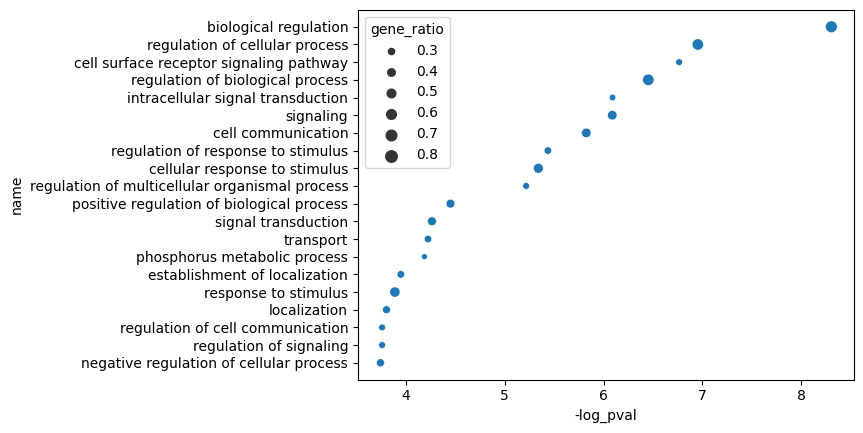

In [33]:
temp = df_enrich[df_enrich["source"] == "GO:BP"]

sns.scatterplot(temp[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

#### REAC

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

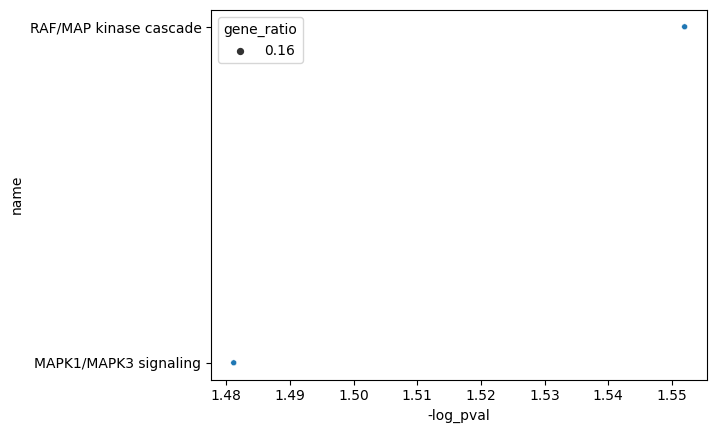

In [34]:
temp = df_enrich[df_enrich["source"] == "REAC"]

sns.scatterplot(temp[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

#### All databases

<AxesSubplot: xlabel='-log_pval', ylabel='name'>

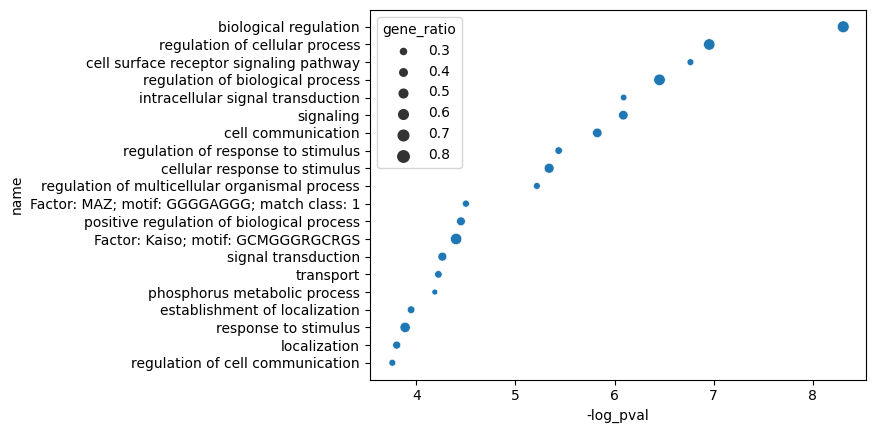

In [35]:
sns.scatterplot(df_enrich[0:20], x = "-log_pval", y = "name", size = "gene_ratio")

### precision
[//]: # (-.- .tabset .tabset-pills)

In [36]:
test = df_enrich.sort_values("precision", ascending = False)

#### KEGG

<AxesSubplot: xlabel='precision', ylabel='name'>

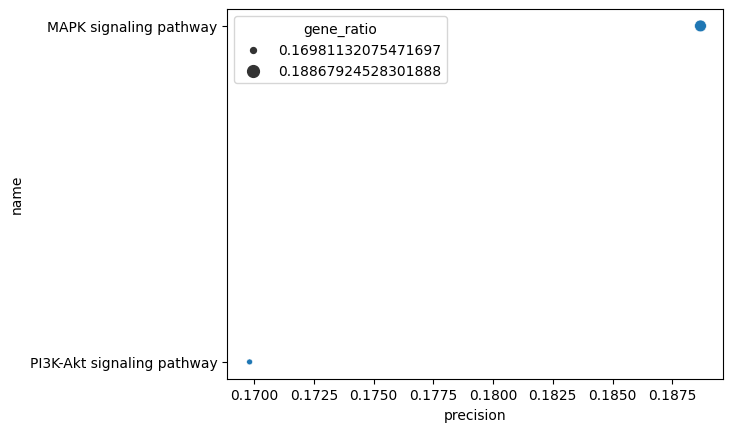

In [37]:
temp = test[test["source"] == "KEGG"]

sns.scatterplot(temp[0:20], x = "precision", y = "name", size = "gene_ratio")

#### GO:BP

<AxesSubplot: xlabel='precision', ylabel='name'>

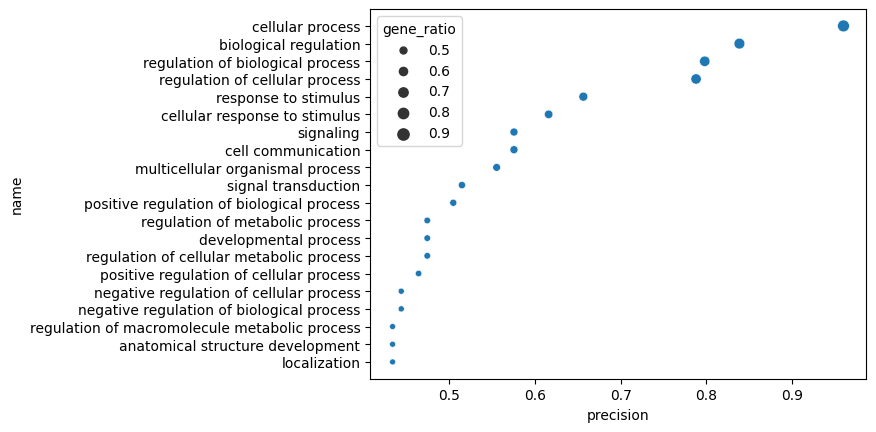

In [38]:
temp = test[test["source"] == "GO:BP"]

sns.scatterplot(temp[0:20], x = "precision", y = "name", size = "gene_ratio")

#### REAC

<AxesSubplot: xlabel='precision', ylabel='name'>

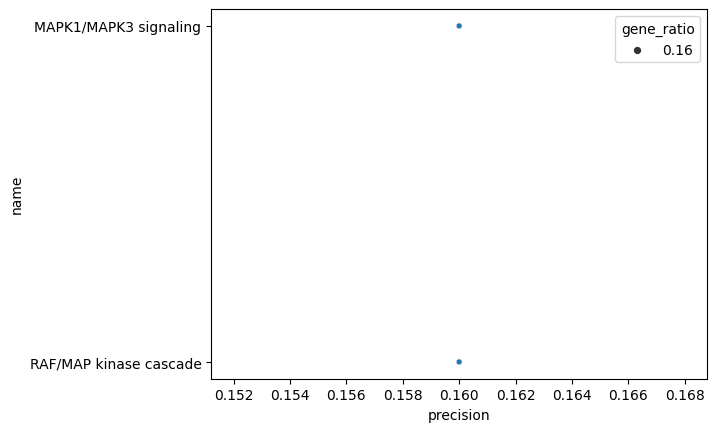

In [39]:
temp = test[test["source"] == "REAC"]

sns.scatterplot(temp[0:20], x = "precision", y = "name", size = "gene_ratio")

categories: Healthy, Early_Stages, Tumor
var_group_labels: Early_Stages


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


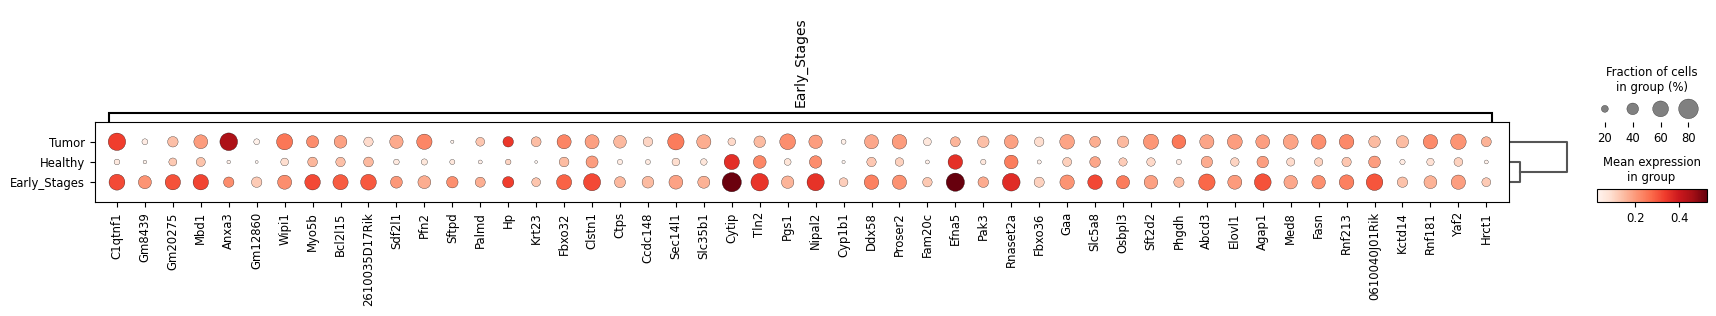

In [42]:
sc.pl.rank_genes_groups_dotplot(adata_epi, groupby="Stage", key = "early_vs_healthy_filtered", n_genes = 50)

#sc.pl.dotplot(adata_cDC1, genes, groupby="louvain")
#sc.pl.rank_genes_groups_dotplot(adata_cDC1, key = "rank_genes_groups_filtered", n_genes= 5 )
#sc.pl.rank_genes_groups_dotplot(adata_cDC1, key = "rank_genes_groups_filtered", n_genes= 5, groupby = "Stage")

In [43]:
sc.tl.rank_genes_groups(adata_epi, "Stage")
sc.tl.filter_rank_genes_groups(adata_epi, key = "rank_genes_groups", min_fold_change=-1000, min_in_group_fraction = 0.1)



ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: -1000, max_out_group_fraction: 0.5


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


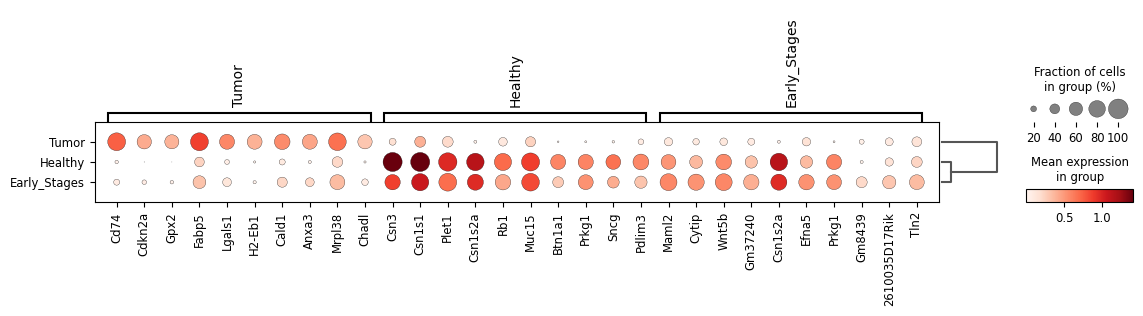

In [44]:
sc.pl.rank_genes_groups_dotplot(adata_epi, key = "rank_genes_groups_filtered")


categories: Healthy, Early_Stages, Tumor
var_group_labels: Early_Stages


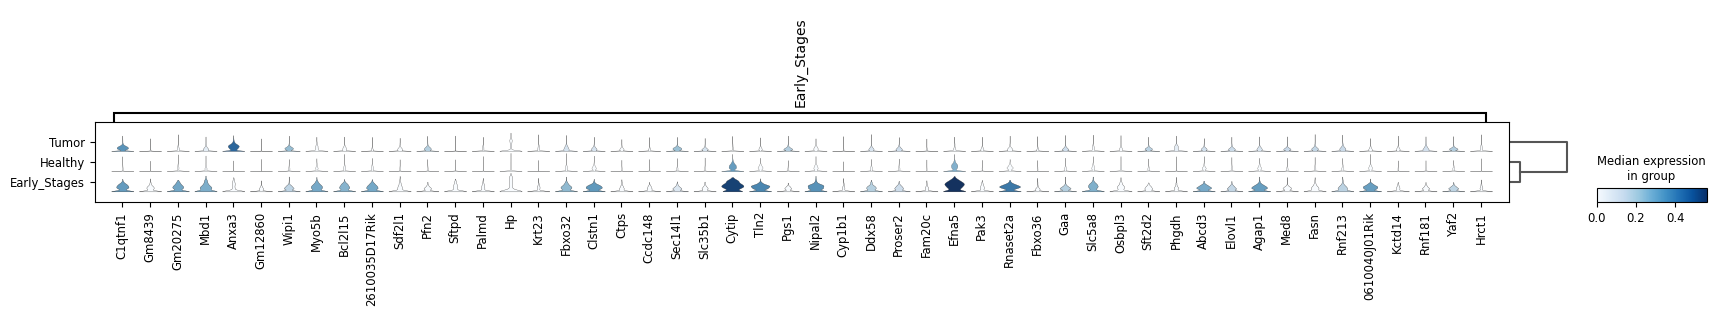

In [49]:
sc.pl.rank_genes_groups_stacked_violin(adata_epi, groupby="Stage", key = "early_vs_healthy_filtered", n_genes = 50)


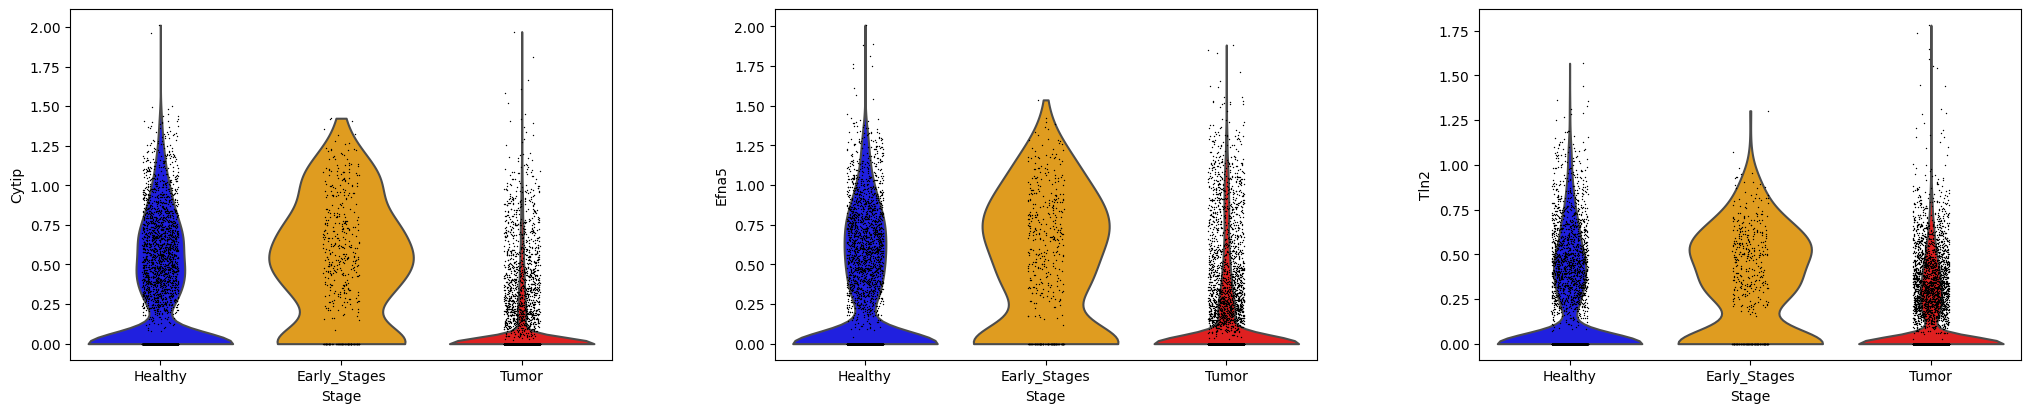

In [59]:
sc.pl.violin(adata_epi, ["Cytip", "Efna5", "Tln2"], groupby = "Stage")

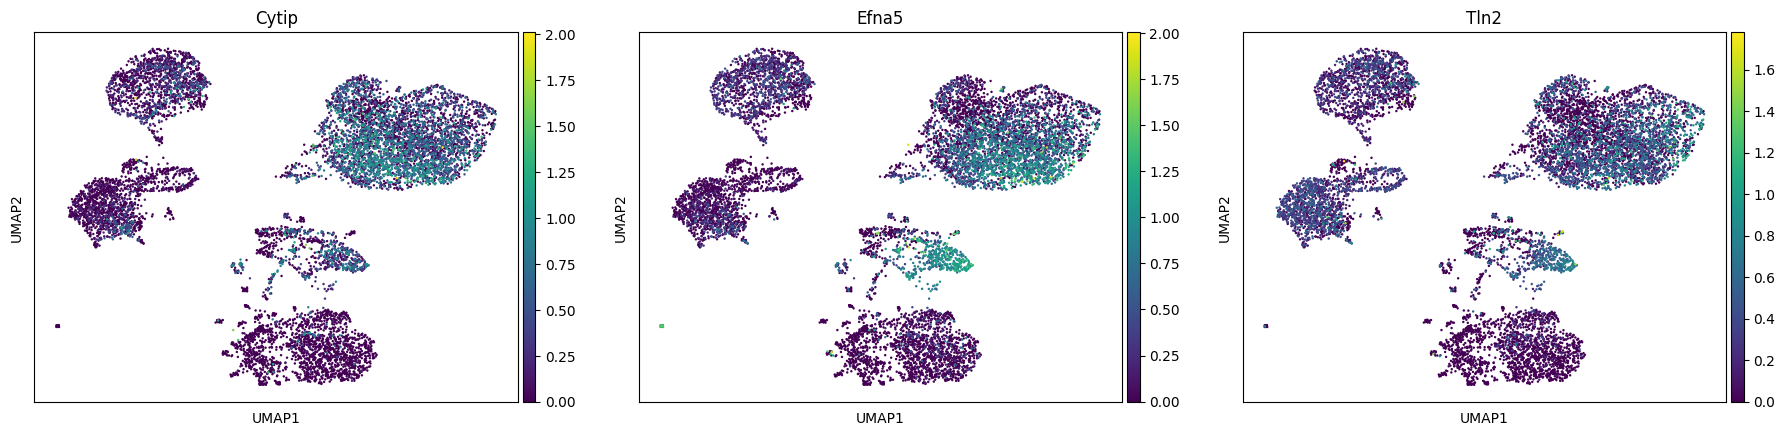

In [60]:
sc.pl.umap(adata_epi, color = ["Cytip", "Efna5", "Tln2"])